In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
merged = pd.read_csv("../Data/Processed/Merged_Data.csv")
print(merged.head())

         date   region resource_type  usage_cpu  usage_storage  users_active  \
0  2023-01-01  east us            vm         88           1959           470   
1  2023-01-01  east us       storage         92           1595           388   
2  2023-01-01  east us     container         70            621           414   
3  2023-01-01  west us            vm         60           1982           287   
4  2023-01-01  west us       storage         85           1371           351   

   economic_index  cloud_market_demand  holiday  
0          104.97                 0.99        1  
1          104.97                 0.99        1  
2          104.97                 0.99        1  
3          104.97                 0.99        1  
4          104.97                 0.99        1  


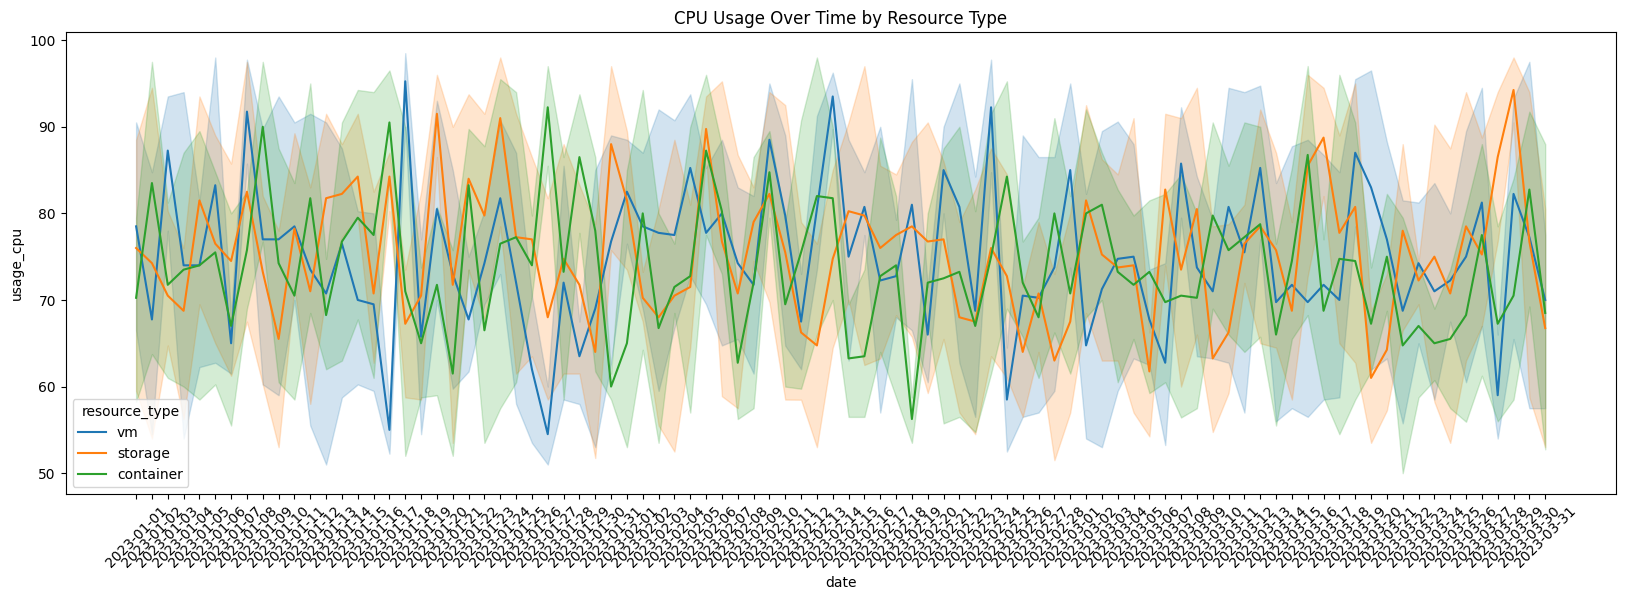

In [49]:
plt.figure(figsize=(20,6))
sns.lineplot(data=merged, x="date", y="usage_cpu", hue="resource_type")
plt.title("CPU Usage Over Time by Resource Type")
plt.xticks(rotation=45)
plt.show()

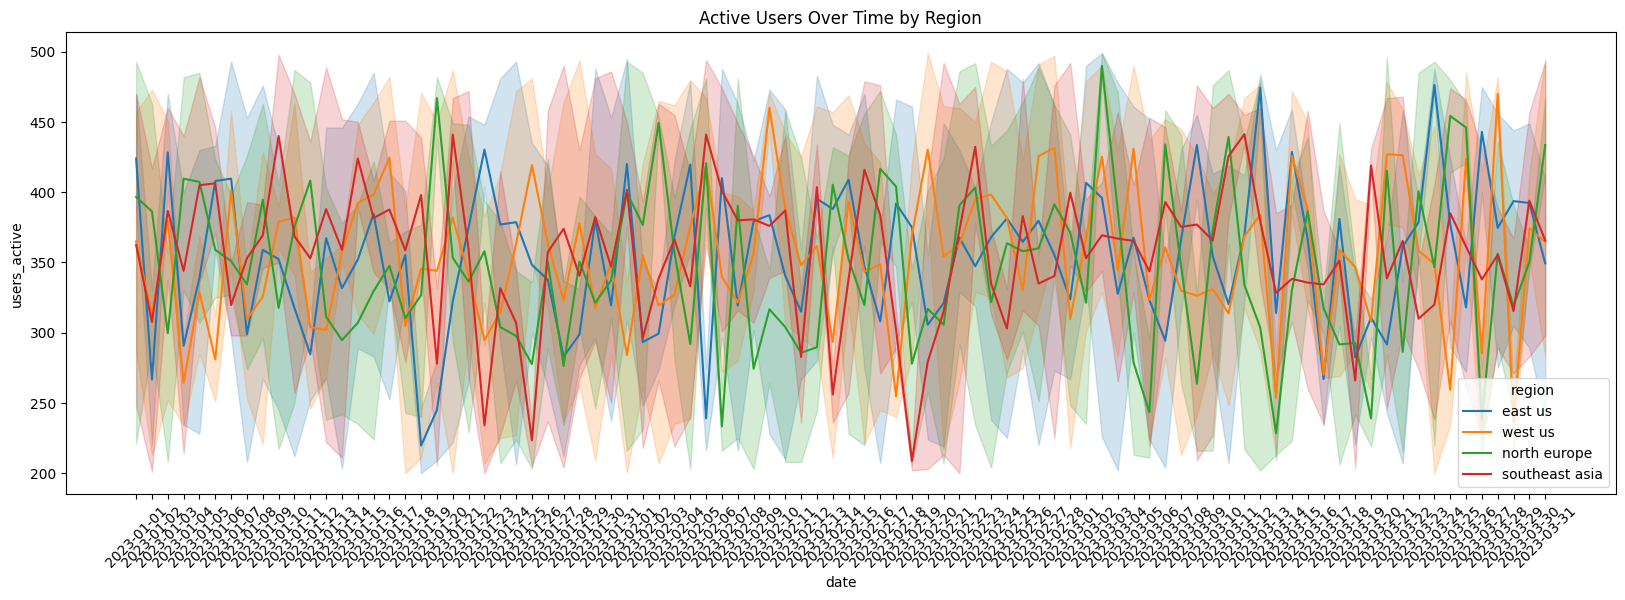

In [50]:
plt.figure(figsize=(20,6))
sns.lineplot(data=merged, x="date", y="users_active", hue="region")
plt.title("Active Users Over Time by Region")
plt.xticks(rotation=45)
plt.show()

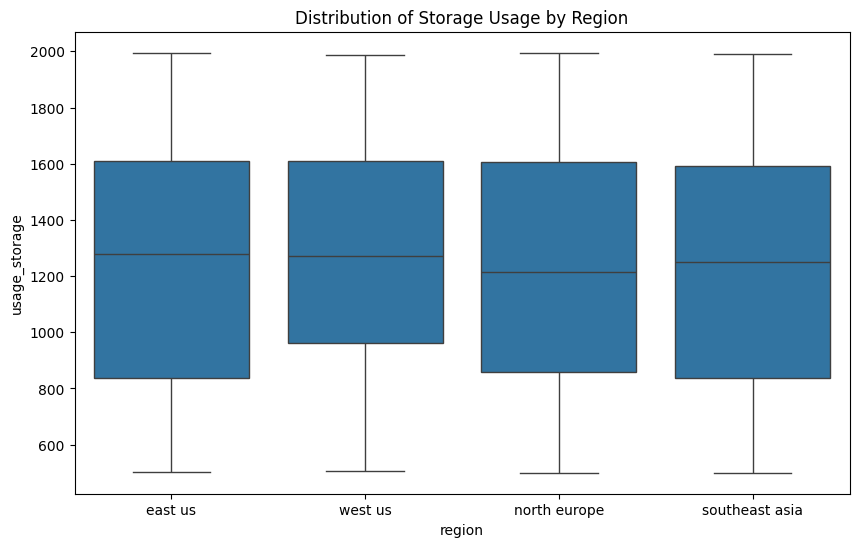

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x="region", y="usage_storage")
plt.title("Distribution of Storage Usage by Region")
plt.show()


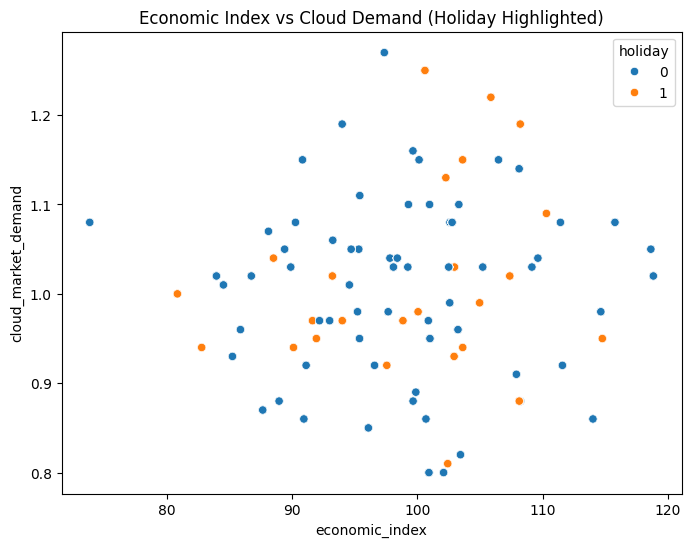

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="economic_index", y="cloud_market_demand", hue="holiday")
plt.title("Economic Index vs Cloud Demand (Holiday Highlighted)")
plt.show()

